# A Demo of a Jupyter Notebook

Welcome to your first interactive Jupyter notebook! This will be our main working environment for this class.

We will show a quick visualization of the titanic dataset to demo the notebook.


In [2]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic.head())
print(titanic.describe())


# remove the alone column 
titanic.drop('alone', axis=1, inplace=True)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.3815

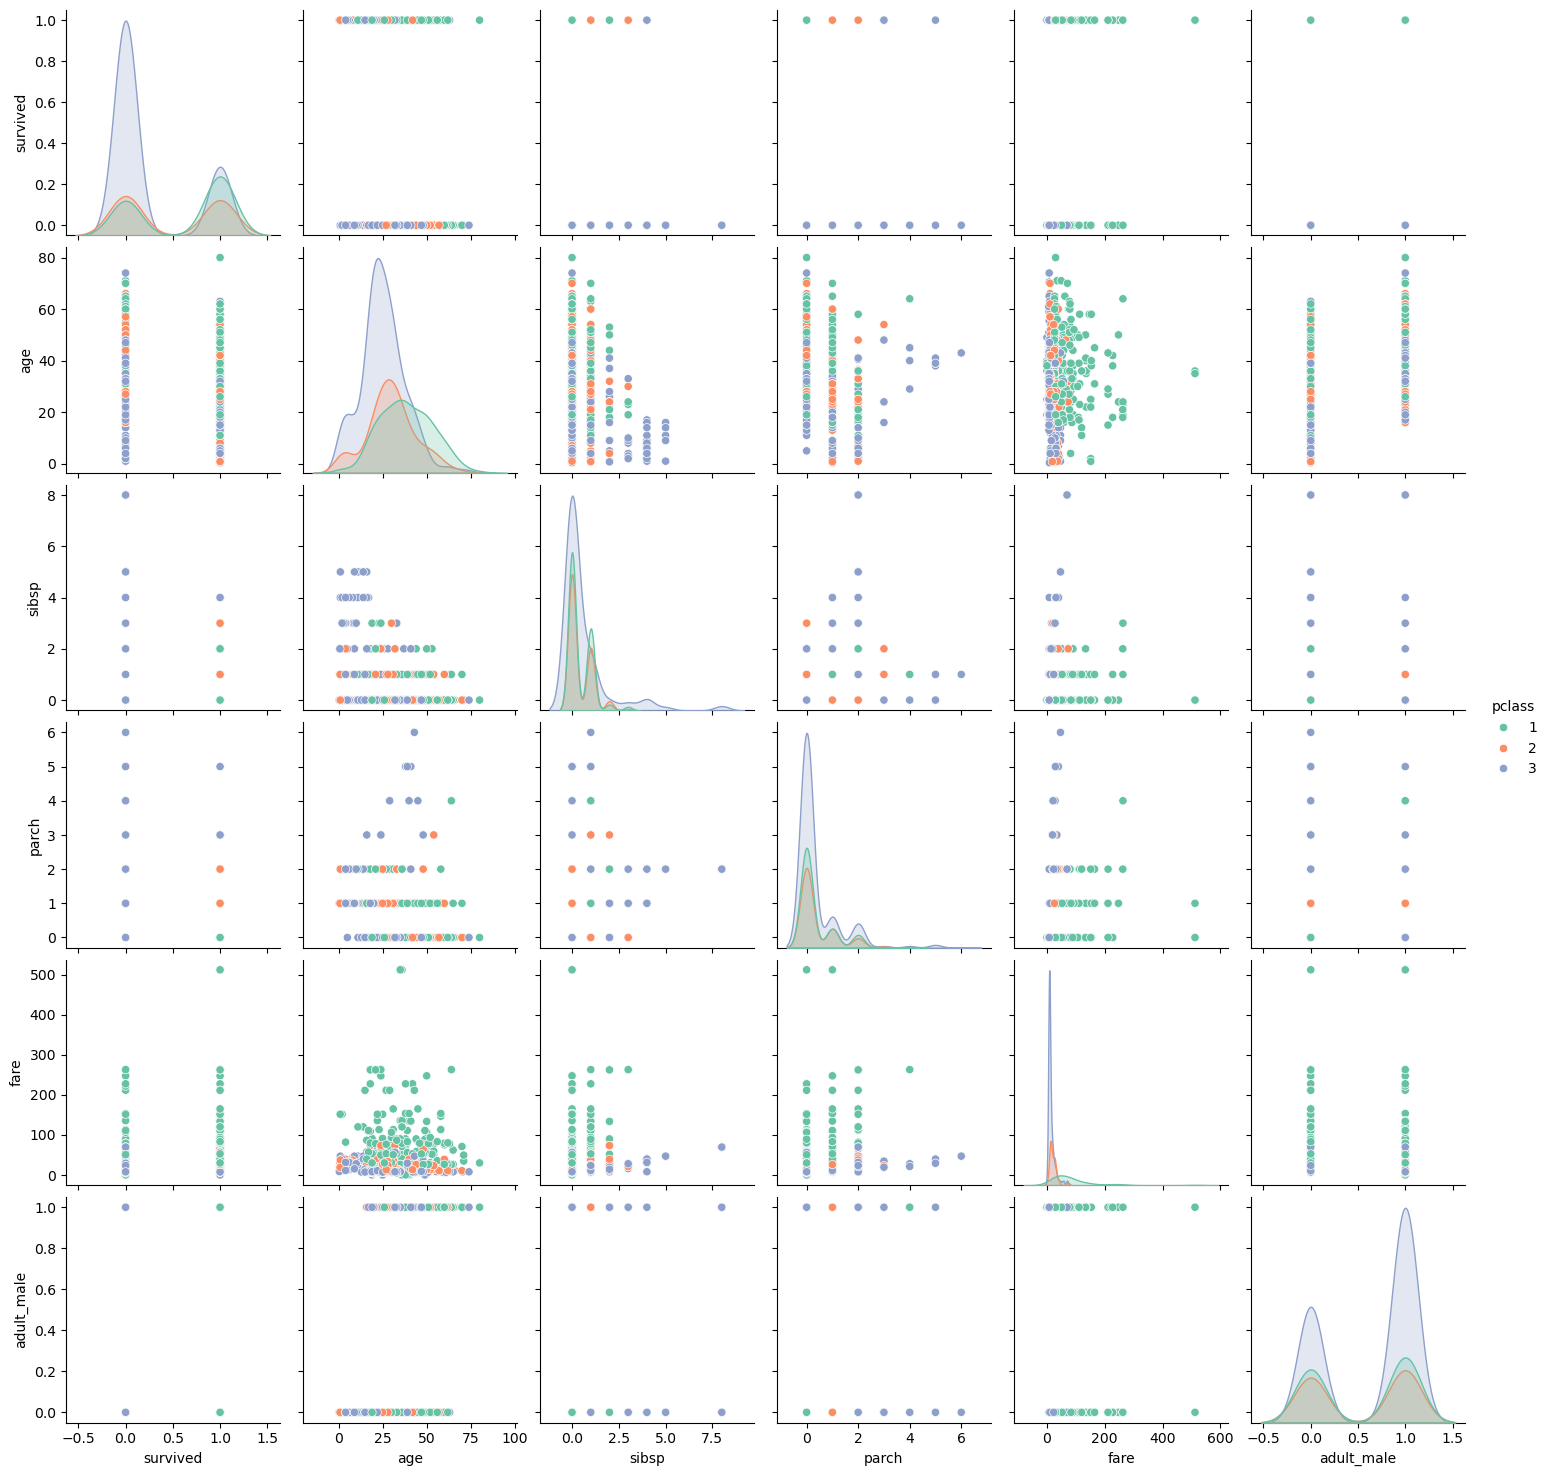

In [3]:
# print a pairplot of the titanic dataset and color-code by Pclass (passenger class). User a color brewer discrete color palette 
# the seaborn color palette documentation is here: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.pairplot(titanic, hue='pclass', palette="Set2")

In [4]:
# compute how many passengers survived and how many died based on the 'survived' column in the titanic dataset
survived = titanic['survived'].value_counts();
print(survived) 

survived
0    549
1    342
Name: count, dtype: int64


In [8]:
# compute the ratio of passengers that survived in first, second and third class
# hint: use the groupby function to group by class and then use the mean function to compute the ratio of passengers that survived
# you have to use the numeric_only flag because you also have categorical values in the dataset

titanic.groupby('pclass').mean(numeric_only=True)

,survived,age,sibsp,parch,fare,adult_male
pclass,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695


In [10]:
# filter the titanic dataset to remove all men and then print the first 5 rows of the filtered dataset
women = titanic[titanic["sex"]=="female"] 
women.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes


<Axes: xlabel='fare', ylabel='age'>

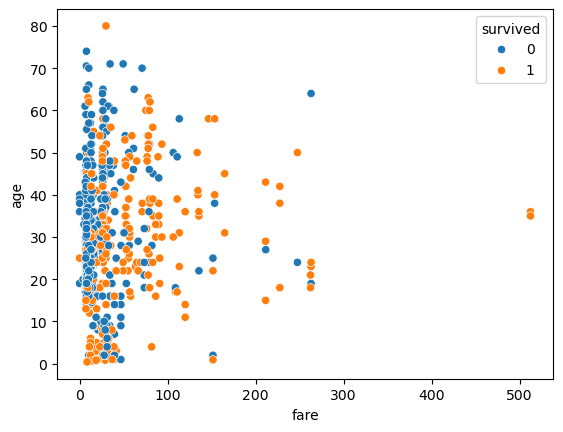

In [12]:
# plot two scatterplot of fare and age, faceted by survived in seaborn. 
sns.scatterplot(titanic, x="fare", y="age", hue="survived")

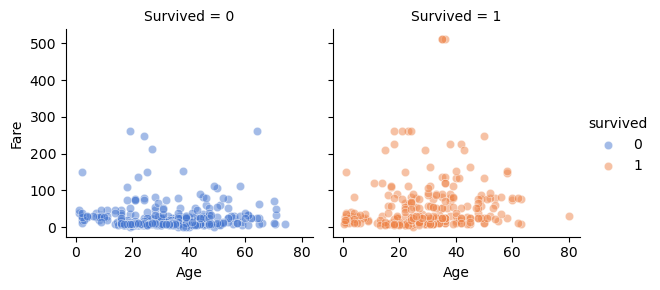

In [14]:
g = sns.FacetGrid(titanic, col='survived', hue='survived', palette="muted")
g.map_dataframe(sns.scatterplot, x='age', y='fare', alpha=.5)
g.set_axis_labels('Age', 'Fare')
g.set_titles(col_template='Survived = {col_name}')
g.add_legend()